# **Model Predicting Approx Total Revenue Through Different Regression Techniques**                                                                       


**Group Members:**


    





1. 202418013 - Darshita Dwivedi
2. 202418025 - Kelvi Bhesdadiya
3. 202418057 - Eric Thomas
4. 202418058 - Ujjwal Bhansali   





Importing All the Required Function From the Library

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline

from sklearn.model_selection import KFold, GridSearchCV

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor


The Dataset is taken from the kaggle
Link:-https://www.kaggle.com/datasets/suraj520/dairy-goods-sales-dataset/data

In [2]:
df = pd.read_csv('dairy_dataset.csv')


About Dataset

The Dairy Goods Sales Dataset provides a detailed and comprehensive collection of data related to dairy farms, dairy products, sales, and inventory management.

**Exploratory Data Analysis**

In [27]:
df

,Location,Total Land Area (acres),Number of Cows,Farm Size,Date,Product ID,Product Name,Brand,Quantity (liters/kg),Price per Unit,...,Production Date,Expiration Date,Quantity Sold (liters/kg),Price per Unit (sold),Approx. Total Revenue(INR),Customer Location,Sales Channel,Quantity in Stock (liters/kg),Minimum Stock Threshold (liters/kg),Reorder Quantity (liters/kg)
0,Telangana,310.84,96,Medium,17-02-2022,5,Ice Cream,Dodla Dairy,222.40,85.72,...,27-12-2021,21-01-2022,7,82.24,575.68,Madhya Pradesh,Wholesale,215,19.55,64.03
1,Uttar Pradesh,19.19,44,Large,01-12-2021,1,Milk,Amul,687.48,42.61,...,03-10-2021,25-10-2021,558,39.24,21895.92,Kerala,Wholesale,129,43.17,181.10
2,Tamil Nadu,581.69,24,Medium,28-02-2022,4,Yogurt,Dodla Dairy,503.48,36.50,...,14-01-2022,13-02-2022,256,33.81,8655.36,Madhya Pradesh,Online,247,15.10,140.83
3,Telangana,908.00,89,Small,09-06-2019,3,Cheese,Britannia Industries,823.36,26.52,...,15-05-2019,26-07-2019,601,28.92,17380.92,Rajasthan,Online,222,74.50,57.68
4,Maharashtra,861.95,21,Medium,14-12-2020,8,Buttermilk,Mother Dairy,147.77,83.85,...,17-10-2020,28-10-2020,145,83.07,12045.15,Jharkhand,Retail,2,76.02,33.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4320,Delhi,748.71,89,Medium,24-02-2022,6,Curd,Mother Dairy,554.90,88.45,...,16-02-2022,21-02-2022,352,87.20,30694.40,Uttar Pradesh,Online,202,98.07,33.53
4321,Jharkhand,385.91,29,Large,14-05-2022,4,Yogurt,Palle2patnam,818.33,55.35,...,22-03-2022,14-04-2022,68,58.39,3970.52,Kerala,Retail,750,87.41,114.37
4322,Chandigarh,311.54,65,Small,05-01-2020,6,Curd,Mother Dairy,583.56,92.61,...,04-01-2020,11-01-2020,141,89.46,12613.86,Haryana,Retail,442,33.47,153.66
4323,Maharashtra,890.55,90,Small,25-10-2022,6,Curd,Raj,3.10,15.30,...,02-10-2022,09-10-2022,2,10.56,21.12,Jharkhand,Wholesale,1,58.25,160.84


In [30]:
df.shape

(4325, 23)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4325 entries, 0 to 4324
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Location                             4325 non-null   object 
 1   Total Land Area (acres)              4325 non-null   float64
 2   Number of Cows                       4325 non-null   int64  
 3   Farm Size                            4325 non-null   object 
 4   Date                                 4325 non-null   object 
 5   Product ID                           4325 non-null   int64  
 6   Product Name                         4325 non-null   object 
 7   Brand                                4325 non-null   object 
 8   Quantity (liters/kg)                 4325 non-null   float64
 9   Price per Unit                       4325 non-null   float64
 10  Total Value                          4325 non-null   float64
 11  Shelf Life (days)             

In [29]:
df.describe()

,Total Land Area (acres),Number of Cows,Product ID,Quantity (liters/kg),Price per Unit,Total Value,Shelf Life (days),Quantity Sold (liters/kg),Price per Unit (sold),Approx. Total Revenue(INR),Quantity in Stock (liters/kg),Minimum Stock Threshold (liters/kg),Reorder Quantity (liters/kg)
count,4325.000000,4325.000000,4325.000000,4325.000000,4325.000000,4325.000000,4325.000000,4325.000000,4325.00000,4325.000000,4325.000000,4325.000000,4325.000000
mean,503.483073,54.963699,5.509595,500.652657,54.785938,27357.845411,29.127630,248.095029,54.77914,13580.265401,252.068671,55.826143,109.107820
std,285.935061,26.111487,2.842979,288.975915,26.002815,21621.051594,30.272114,217.024182,26.19279,14617.009122,223.620870,26.301450,51.501035
min,10.170000,10.000000,1.000000,1.170000,10.030000,42.516500,1.000000,1.000000,5.21000,12.540000,0.000000,10.020000,20.020000
25%,252.950000,32.000000,3.000000,254.170000,32.460000,9946.814500,10.000000,69.000000,32.64000,2916.650000,66.000000,32.910000,64.280000
50%,509.170000,55.000000,6.000000,497.550000,54.400000,21869.652900,22.000000,189.000000,54.14000,8394.540000,191.000000,56.460000,108.340000
75%,751.250000,77.000000,8.000000,749.780000,77.460000,40954.441000,30.000000,374.000000,77.46000,19504.550000,387.000000,79.010000,153.390000
max,999.530000,100.000000,10.000000,999.930000,99.990000,99036.369600,150.000000,960.000000,104.51000,89108.900000,976.000000,99.990000,199.950000


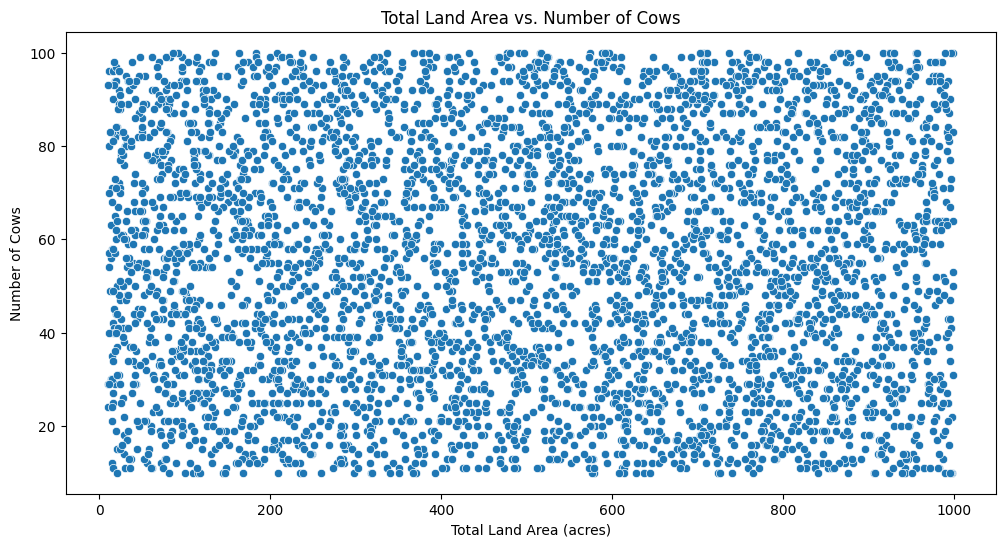

In [3]:
# Scatter Plot
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='Total Land Area (acres)', y='Number of Cows')
plt.title('Total Land Area vs. Number of Cows')
plt.xlabel('Total Land Area (acres)')
plt.ylabel('Number of Cows')
plt.show()

Checking Relation Between Total Revenue and Brand

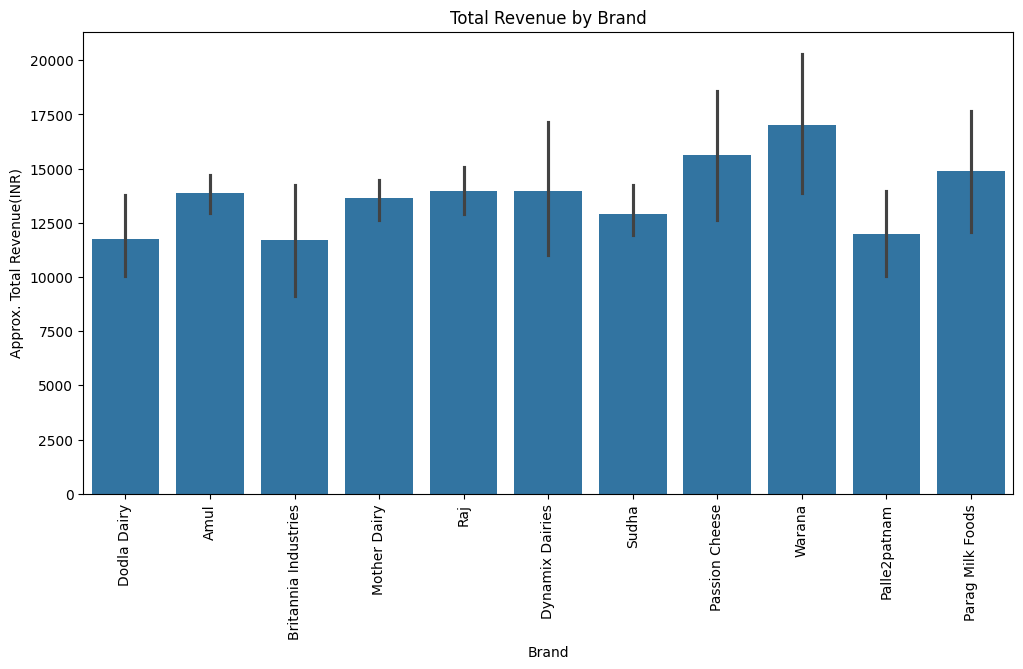

In [4]:
# Bar Chart
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='Brand', y='Approx. Total Revenue(INR)')
plt.title('Total Revenue by Brand')
plt.xlabel('Brand')
plt.ylabel('Approx. Total Revenue(INR)')
plt.xticks(rotation=90)
plt.show()

Getting relation between Shelf Life and Frequency of Self Life

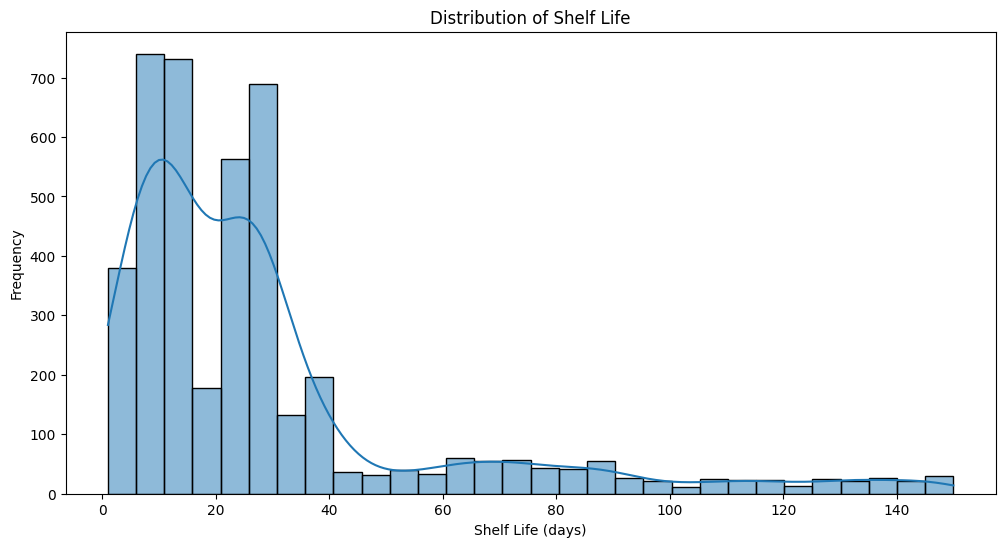

In [5]:
# Histogram
plt.figure(figsize=(12, 6))
sns.histplot(df['Shelf Life (days)'], bins=30, kde=True)
plt.title('Distribution of Shelf Life')
plt.xlabel('Shelf Life (days)')
plt.ylabel('Frequency')
plt.show()

Correlation between  Total Value , Shelf Life , Quantity in Stock , Minimum Stock Threshold , Approx. Total Revenue(INR)

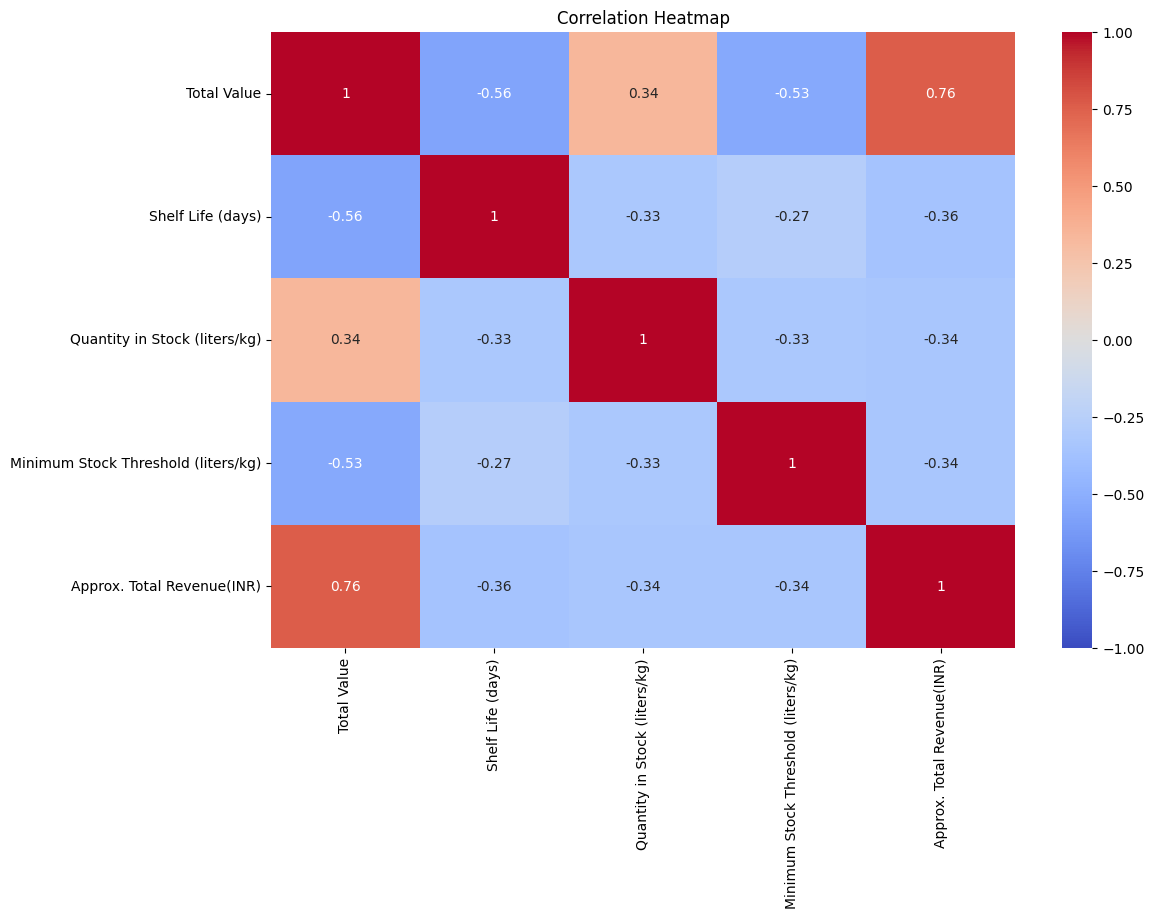

In [6]:
# Heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = df[[ 'Total Value', 'Shelf Life (days)', 'Quantity in Stock (liters/kg)','Minimum Stock Threshold (liters/kg)','Approx. Total Revenue(INR)']].corr()
sns.heatmap(correlation_matrix.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()


Approx Total Revenue has Correlation with Total Value  

Stack Bar Chart of Storage Condition by Quantity in Stock

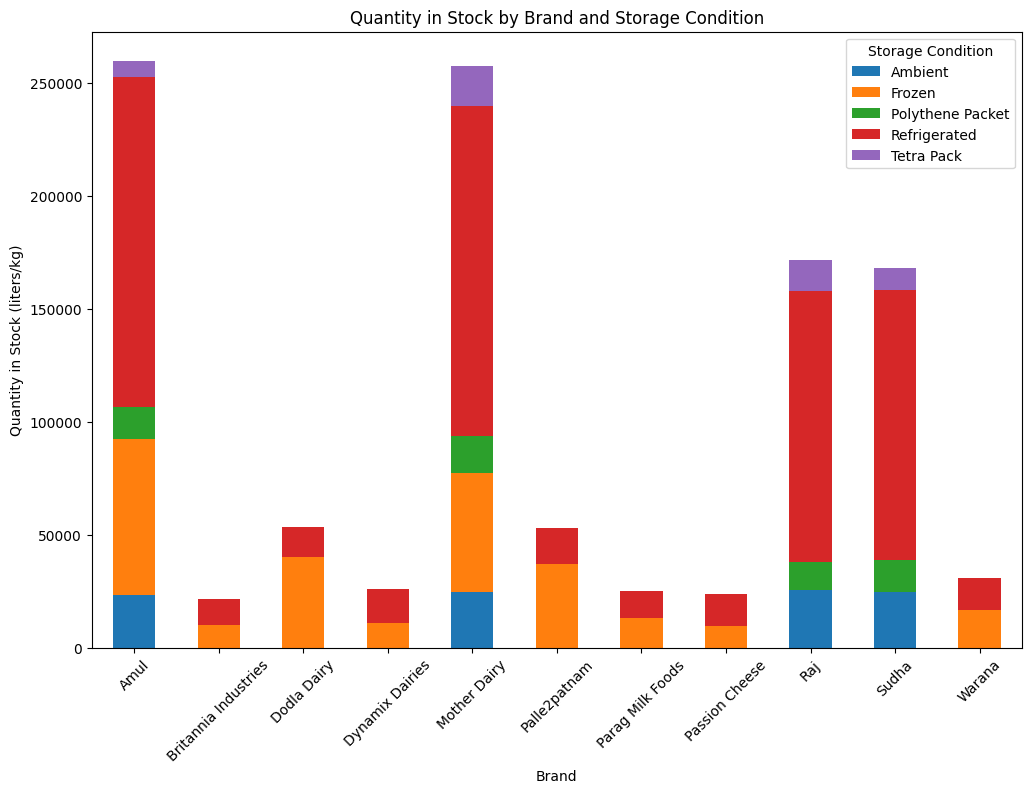

In [7]:
# Pivot the data for stacked bar chart
pivot_df = df.pivot_table(index='Brand', columns='Storage Condition', values='Quantity in Stock (liters/kg)', aggfunc='sum')
pivot_df.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Quantity in Stock by Brand and Storage Condition')
plt.xlabel('Brand')
plt.ylabel('Quantity in Stock (liters/kg)')
plt.xticks(rotation=45)
plt.legend(title='Storage Condition')
plt.show()

Trends of Quantity in stocks by Shelf Life

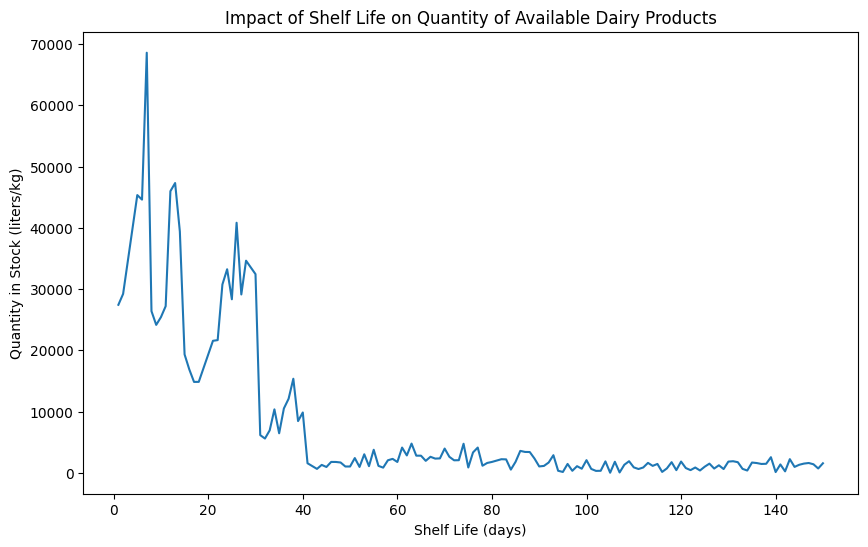

In [8]:
shelf_life_impact = df.groupby(['Shelf Life (days)']).agg({
    'Quantity in Stock (liters/kg)': 'sum'
}).reset_index()
plt.figure(figsize=(10, 6))
plt.plot(shelf_life_impact['Shelf Life (days)'], shelf_life_impact['Quantity in Stock (liters/kg)'])
plt.xlabel('Shelf Life (days)')
plt.ylabel('Quantity in Stock (liters/kg)')
plt.title('Impact of Shelf Life on Quantity of Available Dairy Products')
plt.show()

We will be removing the features that will not be useful in prediction

In [9]:
feature_column = df[['Brand','Product Name', 'Total Value', 'Shelf Life (days)', 'Storage Condition','Quantity in Stock (liters/kg)', 'Minimum Stock Threshold (liters/kg)']]
target_column = df['Approx. Total Revenue(INR)']

Now divided the dataset into training, testing, and validation sets

In [10]:
X_train, X_test, y_train, y_test = train_test_split(feature_column, target_column,test_size=0.1, random_state=42)


Defining all the preprocessing for the dataset

In [11]:
numerical_features = feature_column.select_dtypes(include=['int64', 'float64']).columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('scaler', StandardScaler())
        ]), numerical_features),
        ('cat', Pipeline(steps=[
            ('encoder', OneHotEncoder(handle_unknown='ignore'))
        ]), feature_column.columns.difference(numerical_features))
    ])

                                              First  Model : Linear Regression             

Making a pipeline for Linear Regression

In [12]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

Performing Nested K  Fold Cross-Validation

In [13]:
outer_cv = KFold(n_splits=9, shuffle=True, random_state=42)
outer_mse_scores = []
outer_r2_scores = []
outer_mae_scores=[]
param_grid = {
  'model__fit_intercept': [True, False]  # Whether to fit the intercept term
}

for train_idx, val_idx in outer_cv.split(X_train):
    X_train_fold, X_val_fold = X_train.iloc[train_idx], X_train.iloc[val_idx]
    y_train_fold, y_val_fold = y_train.iloc[train_idx], y_train.iloc[val_idx]
    inner_cv = KFold(n_splits=3, shuffle=True, random_state=42)
    grid_search = GridSearchCV(
        estimator=pipeline,
        param_grid = param_grid,
        cv=inner_cv,
        scoring='neg_mean_squared_error',
        n_jobs=-1
    )

    grid_search.fit(X_train_fold, y_train_fold)
    y_pred = grid_search.predict(X_val_fold)



    mse = mean_squared_error(y_val_fold, y_pred)
    r2 = r2_score(y_val_fold, y_pred)
    mae=mean_absolute_error(y_val_fold, y_pred)
    outer_mae_scores.append(mae)
    outer_mse_scores.append(mse)
    outer_r2_scores.append(r2)

Fitting the data to the model by using the GridSearch Model

In [14]:
grid_search.fit(X_train, y_train)
y_test_pred = grid_search.predict(X_test)
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)
test_mae=mean_absolute_error(y_test, y_test_pred)

Getting the Mean of the score in the k fold

In [15]:
average_mse = np.mean(outer_mse_scores)
average_r2 = np.mean(outer_r2_scores)
average_mae= np.mean(outer_mae_scores)

In [16]:
print(f"Average Mean Squared Error (Validation Set): {average_mse}")
print(f"Average R^2 Score (Validation Set): {average_r2}")
print(f"Average Mean Absolute Error (Validation Set): {average_mae}")

print("---------- Test Set Error --------------")

print(f"Mean Squared Error (Test Set): {test_mse}")
print(f"R^2 Score (Test Set): {test_r2}")
print(f"Mean Absolute Error(Test Set): {test_r2}")


Average Mean Squared Error (Validation Set): 42695348.089681625
Average R^2 Score (Validation Set): 0.7972773666423403
Average Mean Absolute Error (Validation Set): 4939.443022391542
---------- Test Set Error --------------
Mean Squared Error (Test Set): 36987356.994238585
R^2 Score (Test Set): 0.8299205248710904
Mean Absolute Error(Test Set): 0.8299205248710904


                      Second Model : Polynomial Regression                                 

Pipeline for Polynomial Regression                                  

In [17]:

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('poly', PolynomialFeatures()),
    ('model', LinearRegression())
])

Performing Nested K Fold Cross-Validation

In [18]:
outer_cv = KFold(n_splits=9, shuffle=True, random_state=42)
outer_mse_scores = []
outer_r2_scores = []

for train_idx, val_idx in outer_cv.split(X_train):
    X_train_fold, X_val_fold = X_train.iloc[train_idx], X_train.iloc[val_idx]
    y_train_fold, y_val_fold = y_train.iloc[train_idx], y_train.iloc[val_idx]

    inner_cv = KFold(n_splits=3, shuffle=True, random_state=42)
    grid_search = GridSearchCV(
        estimator=pipeline,
        param_grid={'poly__degree': [2]},
        cv=inner_cv,
        scoring='neg_mean_squared_error',
        n_jobs=-1
    )

    grid_search.fit(X_train_fold, y_train_fold)
    y_pred = grid_search.predict(X_val_fold)
    mse = mean_squared_error(y_val_fold, y_pred)
    r2 = r2_score(y_val_fold, y_pred)
    mae=mean_absolute_error(y_val_fold, y_pred)
    outer_mae_scores.append(mae)
    outer_mse_scores.append(mse)
    outer_r2_scores.append(r2)

Fitting the data to the model by using the GridSearch Model

In [19]:
grid_search.fit(X_train, y_train)
y_test_pred = grid_search.predict(X_test)
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)
test_mae=mean_absolute_error(y_test, y_test_pred)

Getting the Mean of the score in the k fold

In [20]:
average_mse = np.mean(outer_mse_scores)
average_r2 = np.mean(outer_r2_scores)
average_mae= np.mean(outer_mae_scores)

In [21]:
print(f"Average Mean Squared Error (Validation Set): {average_mse}")
print(f"Average R^2 Score (Validation Set): {average_r2}")
print(f"Average Mean Absolute Error (Validation Set): {average_mae}")

print("---------- Test Set Error --------------")

print(f"Mean Squared Error (Test Set): {test_mse}")
print(f"R^2 Score (Test Set): {test_r2}")
print(f"Mean Absolute Error(Test Set): {test_r2}")

Average Mean Squared Error (Validation Set): 12818846.269061092
Average R^2 Score (Validation Set): 0.9390890585081757
Average Mean Absolute Error (Validation Set): 3794.049106879751
---------- Test Set Error --------------
Mean Squared Error (Test Set): 12711074.361389054
R^2 Score (Test Set): 0.9415504909949002
Mean Absolute Error(Test Set): 0.9415504909949002


                  Third Model : Random Forest Regression                                

Pipeline for Random Forest Regression             

In [22]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(random_state=42))
])





Performing Nested K Fold Cross-Validation

In [23]:
outer_cv = KFold(n_splits=9, shuffle=True, random_state=42)
outer_mse_scores = []
outer_r2_scores = []
param_grid = {
  'model__n_estimators': [100, 200, 300],
  'model__min_samples_split': [2, 5, 10],
  'model__min_samples_leaf': [1, 2, 4]
}

for train_idx, val_idx in outer_cv.split(X_train):
    X_train_fold, X_val_fold = X_train.iloc[train_idx], X_train.iloc[val_idx]
    y_train_fold, y_val_fold = y_train.iloc[train_idx], y_train.iloc[val_idx]

    inner_cv = KFold(n_splits=3, shuffle=True, random_state=42)

    grid_search = GridSearchCV(
        estimator=pipeline,
        param_grid = param_grid,
        cv=inner_cv,
        scoring='neg_mean_squared_error',
        n_jobs=-1
    )

    grid_search.fit(X_train_fold, y_train_fold)
    y_pred = grid_search.predict(X_val_fold)
    mse = mean_squared_error(y_val_fold, y_pred)
    r2 = r2_score(y_val_fold, y_pred)

    outer_mse_scores.append(mse)
    outer_r2_scores.append(r2)

Fitting the data to the model by using the GridSearch Model

In [24]:
grid_search.fit(X_train, y_train)
y_test_pred = grid_search.predict(X_test)
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)
test_mae=mean_absolute_error(y_test, y_test_pred)

Getting the Mean of the score in the k fold

In [25]:
average_mse = np.mean(outer_mse_scores)
average_r2 = np.mean(outer_r2_scores)
average_mae= np.mean(outer_mae_scores)

In [26]:
print(f"Average Mean Squared Error (Validation Set): {average_mse}")
print(f"Average R^2 Score (Validation Set): {average_r2}")
print(f"Average Mean Absolute Error (Validation Set): {average_mae}")

print("---------- Test Set Error --------------")

print(f"Mean Squared Error (Test Set): {test_mse}")
print(f"R^2 Score (Test Set): {test_r2}")
print(f"Mean Absolute Error(Test Set): {test_r2}")

Average Mean Squared Error (Validation Set): 12588995.936222993
Average R^2 Score (Validation Set): 0.940234697360246
Average Mean Absolute Error (Validation Set): 3794.049106879751
---------- Test Set Error --------------
Mean Squared Error (Test Set): 12533159.4595059
R^2 Score (Test Set): 0.9423685995484422
Mean Absolute Error(Test Set): 0.9423685995484422


# **Insights**

Comparisons between Models Performance Our analysis is based on three different regression models: Linear Regression, Polynomial Regression, and Random Forest Regression. Each model offers unique insight that:

**Linear Regression** set a baseline, simply relating each feature to the revenue.

**Polynomial Regression** captured the non-linear relationships that showed patterns that were not obtainable from linear regression. It provided insight into the complex interactions due to its polynomial features.

**Random Forest Regression** gave us better performance; hence, we can handle non-linearities and interaction between the features of this dataset by really bringing out the strength of ensemble methods to increase the accuracy of the prediction.

# Feature Importance and Impact
By analyzing the correlation, we developed important features like 'Total Value' that greatly influences 'Approx. Total Revenue(INR)'. A good insight into inventory management strategy was driven based on the relationship between shelf life vs quantity in stock.

# Model Evaluation
The performance of the model was then exhaustively assessed using nested K-Fold cross-validation. A few of the performance metrics for model performance evaluation are MSE, R² Score, and MAE, which give an actual picture of the strengths and weaknesses of any model. Random Forest Regression presented the most reliable balance between model accuracy and model complexity.

# Novel Insights
Analysis showed how preprocessing and feature engineering are of the essence in model performance improvement. The usage of polynomial features and ensemble methods, such as Random Forest Regression, helped understand the data better for better predictive accuracy.

# Practical Use Recommendations
Random forest regression will also be very confident in real applications of revenue forecast support for financial planning and decisions. Inventory analysis will be useful to find improvements in stock level and product placement strategies.
